In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Cust_Segmentation.csv')
print(df)

     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
..           ...  ...  ...             ...     ...        ...         ...   
845          846   27    1               5      26      0.548       1.220   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio  
0          0.0  NBA001           

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

features = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt','DebtIncomeRatio']]
scaler = StandardScaler()

X = scaler.fit_transform(features)

kmeans_euclidean = KMeans(n_clusters=7, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(X)

distance_matrix=pairwise_distances(X, metric='manhattan')
kmeans_manhattan= KMeans(n_clusters=4,random_state=42,n_init=10)
labels_manhattan=kmeans_manhattan.fit_predict(distance_matrix)

df['Cluster_Euclidean']=labels_euclidean
df['Cluster_Manhattan']=labels_manhattan

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [8]:
print(df)

     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
..           ...  ...  ...             ...     ...        ...         ...   
845          846   27    1               5      26      0.548       1.220   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio  Cluster_Euclidean  Cluster_Manhatt

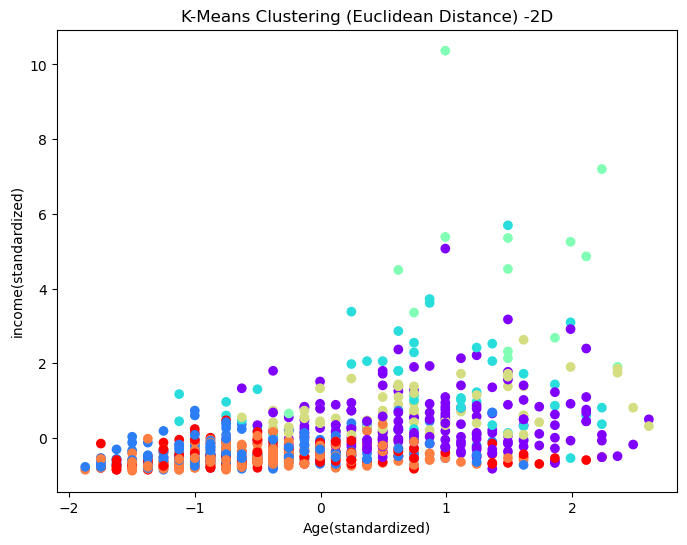

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 3], c=labels_euclidean, cmap='rainbow')
plt.title('K-Means Clustering (Euclidean Distance) -2D')
plt.xlabel('Age(standardized)')
plt.ylabel('income(standardized)')
plt.show()

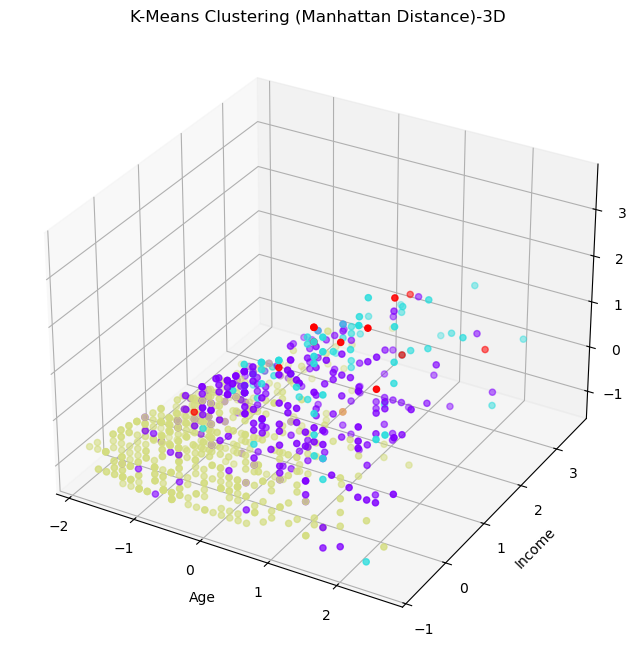

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_manhattan, cmap='rainbow')
ax.set_title('K-Means Clustering (Manhattan Distance)-3D')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Card Debt')
plt.show()